# The California housing dataset

In this notebook, we will quickly present the dataset known as the
"California housing dataset". This dataset can be fetched from internet using
scikit-learn.

In [1]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

We can have a first look at the available description

In [2]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Let's have an overview of the entire dataset.

In [3]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


A written in the descritpion, the dataset contains aggregated data regarding
each district in California. Let's have a close look at the features that
can be used by a predictive model.

In [4]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In this dataset, we have information regarding the demography (income,
population, house occupancy) in the districts, the location of the districts
(latitude, longitude), and general information regarding the house in the
districts (number of rooms, number of bedrooms, age of the house). Since
these statistics are at the granularity of the district, they corresponds to
averages or medians.

Now, let's have a look to the target to be predicted.

In [5]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

The target contains the median of the house value for each district.
Therefore, this problem is a regression problem.

We can now check more into details the data types and if the dataset contains
any missing value.

In [6]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We can see that:

* the dataset contains 20,640 samples and 8 features;
* all features are numerical features encoded as floating number;
* there is no missing values.

Let's have a quick look at the distribution of these features by plotting
their histograms.

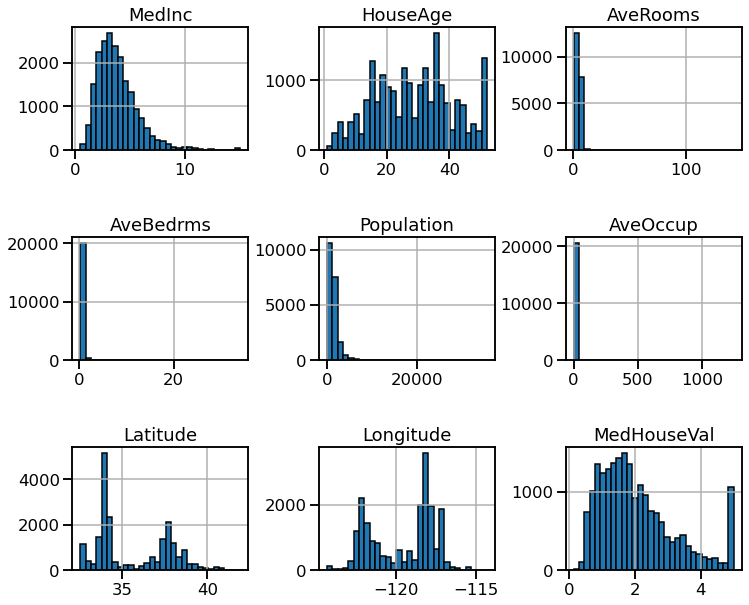

In [7]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

We can first focus on features for which their distributions would be more or
less expected.

The median income is a distribution with a long tail. It means that the
salary of people is more or less normally distributed but there is some
people getting a high salary.

Regarding the average house age, the distribution is more or less uniform.

The target distribution has a long tail as well. In addition, we have a
threshold-effect for high-valued houses: all houses with a price above 5 are
given the value 5.

Focusing on the average rooms, average bedrooms, average occupation, and
population, the range of the data is large with unnoticeable bin for the
largest values. It means that there are very high and few values (maybe they
could be considered as outliers?). We can see this specificity looking at the
statistics for these features:

In [8]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


For each of these features, comparing the `max` and `75%` values, we can see
an huge difference. It confirms the intuitions that there are a couple of
extreme values.

Up to know, we discarded the longitude and latitude that carry geographical
information. In short, the combination of this feature could help us to
decide if there are locations associated with high-valued houses. Indeed,
we could make a scatter plot where the x- and y-axis would be the latitude
and longitude and the circle size and color would be linked with the house
value in the district.

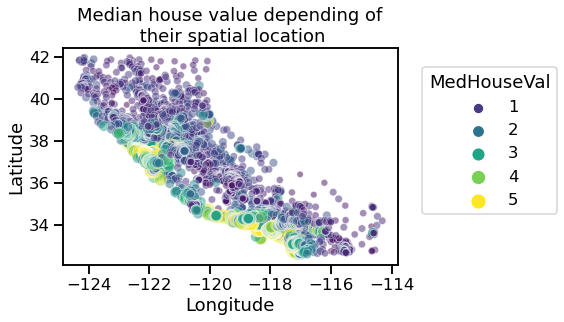

In [9]:
import seaborn as sns

sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

If you are not familiar with the state of California, it is interesting to
notice that all datapoints show a graphical representation of this state.
We note that the high-valued houses will be located on the cost, where the
big cities from California are located: San Diego, Los Angeles, San Jose, or
San Francisco.

We can do a random subsampling to have less data points to plot but that
could still allow us to see these specificities.

In [10]:
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=500,
                     replace=False)

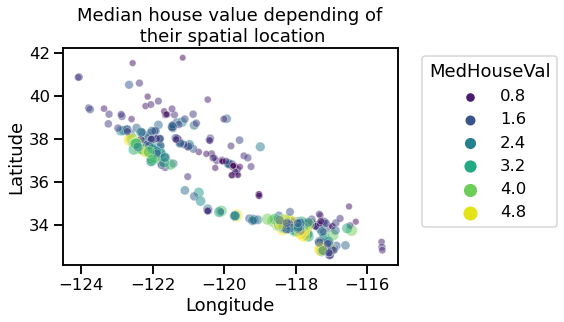

In [11]:
sns.scatterplot(data=california_housing.frame.iloc[indices],
                x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

We can make a final analysis by making a pair plot of all features and the
target but dropping the longitude and latitude. We will quantize the target
such that we can create proper histogram.

In [12]:
import pandas as pd

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

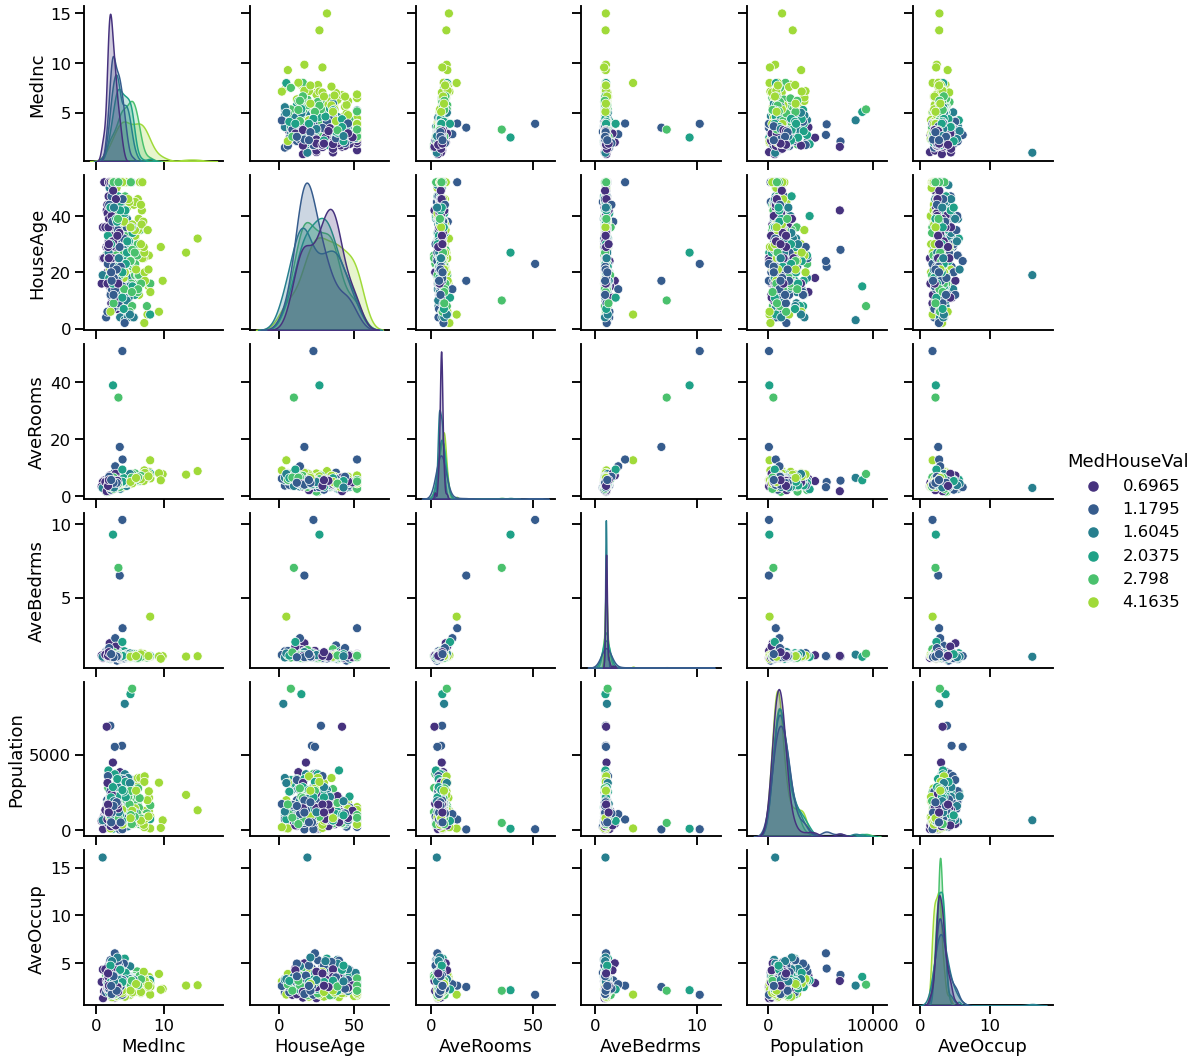

In [13]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

While it is always complicated to interpret a pairplot since there is a lot
of data, here we can get a couple of intuitions. We can confirm that some
features have extreme values (outliers?). We can as well see that the median
income is helpful to distinguish high-valued from low-valued houses.

Thus, creating a predictive model, we could expect the longitude, latitude,
and the median income to be useful features to help at predicting the median
house values.

If you are curious, we created a linear predictive model below and show the
values of the coefficients obtained via cross-validation

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model, california_housing.data, california_housing.target,
    return_estimator=True, n_jobs=-1)

In [15]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} +/- {score.std():.3f}")

R2 score: 0.553 +/- 0.062


In [16]:
import pandas as pd

coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=california_housing.feature_names
)

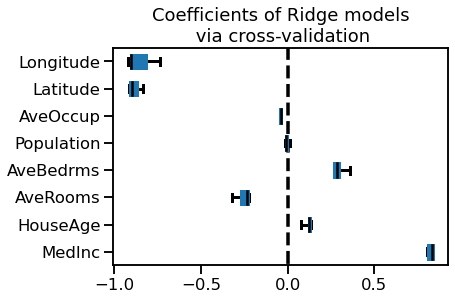

In [17]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Coefficients of Ridge models\n via cross-validation")

It seems that the three features that we earlier spotted are found important
by this model. But be careful regarding interpreting these coefficients.
We let you go into the module "Interpretation" to go in depth regarding such
experiment.